Segmentasi Mahasiswa Berdasarkan Kesehatan Mental dan Gaya Hidup Menggunakan Algoritma Clustering

# Prediksi Tingkat Stres Mahasiswa Berdasarkan Pola Hidup dan Kesehatan Mental

## 1. Problem Statement

Permasalahan kesehatan mental pada mahasiswa menjadi isu penting yang perlu mendapat perhatian. Salah satu indikator utama adalah tingkat stres yang dialami mahasiswa. Proyek ini bertujuan untuk membangun model machine learning yang dapat memprediksi tingkat stres mahasiswa (`Stress_Level`) berdasarkan pola hidup dan faktor-faktor terkait kesehatan mental, seperti jam tidur, aktivitas fisik, kualitas diet, mood, dan status kesehatan mental.

Dengan model ini, diharapkan pihak kampus atau konselor dapat mengidentifikasi mahasiswa yang berisiko mengalami stres tinggi dan memberikan intervensi yang tepat.S

## 2. Data Understanding

Pada tahap ini, dilakukan pemahaman awal terhadap data yang digunakan, termasuk melihat struktur data, tipe data, dan distribusi fitur-fitur utama.

In [2]:
# Import library yang dibutuhkan
import pandas as pd

# Load dataset
df = pd.read_csv('datasets/student_mental_health_dataset.csv')

# Tampilkan 5 baris pertama
display(df.head())

# Info umum dataset
print(df.info())

# Statistik deskriptif
display(df.describe())

# Cek missing value
print(df.isnull().sum())

,Age,Gender,Sleep_Hours,Screen_Time_Hours,Study_Hours,Physical_Activity_Minutes,Diet_Quality,Mood_Rating,Stress_Level,Mental_Health_Status
0,24,Female,6.8,3.2,5.3,97,Good,9,8,Healthy
1,21,Male,4.5,5.8,3.0,64,Poor,8,6,Unhealthy
2,22,Male,7.1,3.0,2.2,30,Average,10,7,Healthy
3,24,Male,7.4,7.5,2.4,29,Poor,9,7,Unhealthy
4,20,Male,7.3,6.2,3.3,111,Poor,1,6,Healthy


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   Gender                     1000 non-null   object 
 2   Sleep_Hours                1000 non-null   float64
 3   Screen_Time_Hours          1000 non-null   float64
 4   Study_Hours                1000 non-null   float64
 5   Physical_Activity_Minutes  1000 non-null   int64  
 6   Diet_Quality               1000 non-null   object 
 7   Mood_Rating                1000 non-null   int64  
 8   Stress_Level               1000 non-null   int64  
 9   Mental_Health_Status       1000 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 78.2+ KB
None


,Age,Sleep_Hours,Screen_Time_Hours,Study_Hours,Physical_Activity_Minutes,Mood_Rating,Stress_Level
count,1000.0000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,21.4980,6.649200,6.026600,3.98310,58.158000,5.592000,5.404000
std,2.3081,1.483543,1.940561,1.55736,34.080882,2.965524,2.949149
min,18.0000,2.100000,-0.000000,-0.50000,0.000000,1.000000,1.000000
25%,19.7500,5.700000,4.700000,2.90000,28.000000,3.000000,3.000000
50%,21.0000,6.600000,6.000000,4.00000,57.000000,6.000000,5.000000
75%,24.0000,7.600000,7.300000,5.00000,87.000000,8.000000,8.000000
max,25.0000,11.300000,12.300000,9.90000,119.000000,10.000000,10.000000


Age                          0
Gender                       0
Sleep_Hours                  0
Screen_Time_Hours            0
Study_Hours                  0
Physical_Activity_Minutes    0
Diet_Quality                 0
Mood_Rating                  0
Stress_Level                 0
Mental_Health_Status         0
dtype: int64


## 3. Data Preparation

Pada tahap ini, dilakukan pembersihan data, penanganan missing value, encoding fitur kategorikal, dan pemilihan fitur yang akan digunakan untuk prediksi.

In [3]:
# Salin dataframe untuk preprocessing
df_clean = df.copy()

# Cek dan hapus duplikasi jika ada
df_clean = df_clean.drop_duplicates()

# Tangani missing value (jika ada)
df_clean = df_clean.dropna()  # Atau gunakan imputasi jika diperlukan

# Encoding fitur kategorikal
from sklearn.preprocessing import LabelEncoder

le_gender = LabelEncoder()
le_diet = LabelEncoder()

df_clean['Gender'] = le_gender.fit_transform(df_clean['Gender'])
df_clean['Diet_Quality'] = le_diet.fit_transform(df_clean['Diet_Quality'])
df_clean['Mental_Health_Status'] = LabelEncoder().fit_transform(df_clean['Mental_Health_Status'])

# Tampilkan hasil preprocessing
display(df_clean.head())

,Age,Gender,Sleep_Hours,Screen_Time_Hours,Study_Hours,Physical_Activity_Minutes,Diet_Quality,Mood_Rating,Stress_Level,Mental_Health_Status
0,24,0,6.8,3.2,5.3,97,1,9,8,0
1,21,1,4.5,5.8,3.0,64,2,8,6,1
2,22,1,7.1,3.0,2.2,30,0,10,7,0
3,24,1,7.4,7.5,2.4,29,2,9,7,1
4,20,1,7.3,6.2,3.3,111,2,1,6,0


## 4. Modeling

Pada tahap ini, data akan dibagi menjadi data latih dan data uji, kemudian dilakukan pelatihan model regresi untuk memprediksi tingkat stres mahasiswa.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Pilih fitur dan target
X = df_clean.drop(['Stress_Level'], axis=1)
y = df_clean['Stress_Level']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model regresi
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test)

## 5. Evaluation

Pada tahap ini, dilakukan evaluasi performa model regresi menggunakan metrik MAE, RMSE, dan R² Score.

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 2.68
Root Mean Squared Error (RMSE): 3.13
R² Score: -0.11


In [6]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("=== Linear Regression ===")
print(f"MAE: {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R² Score: {r2_lr:.2f}")

# XGBoost Regressor
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\n=== XGBoost Regressor ===")
print(f"MAE: {mae_xgb:.2f}")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"R² Score: {r2_xgb:.2f}")

=== Linear Regression ===
MAE: 2.58
RMSE: 2.97
R² Score: -0.00

=== XGBoost Regressor ===
MAE: 3.02
RMSE: 3.62
R² Score: -0.49


In [10]:
# Contoh feature engineering
df_fe = df_clean.copy()
df_fe['Sleep_Deficit'] = 8 - df_fe['Sleep_Hours']
df_fe['Screen_Study_Ratio'] = df_fe['Screen_Time_Hours'] / (df_fe['Study_Hours'] + 1e-3)
df_fe['Activity_Efficiency'] = df_fe['Physical_Activity_Minutes'] / (df_fe['Sleep_Hours'] + 1e-3)
df_fe['Mood_Stress_Gap'] = df_fe['Mood_Rating'] - df_fe['Stress_Level']

# Pilih fitur dan target baru
X_fe = df_fe.drop(['Stress_Level', 'Mood_Stress_Gap'], axis=1)
y_fe = df_fe['Stress_Level']

# Split data
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X_fe, y_fe, test_size=0.2, random_state=42)

# Model Random Forest dengan fitur baru
rf_fe = RandomForestRegressor(random_state=42)
rf_fe.fit(X_train_fe, y_train_fe)
y_pred_fe = rf_fe.predict(X_test_fe)

mae_fe = mean_absolute_error(y_test_fe, y_pred_fe)
rmse_fe = np.sqrt(mean_squared_error(y_test_fe, y_pred_fe))
r2_fe = r2_score(y_test_fe, y_pred_fe)

print("=== Random Forest + Feature Engineering ===")
print(f"MAE: {mae_fe:.2f}")
print(f"RMSE: {rmse_fe:.2f}")
print(f"R² Score: {r2_fe:.2f}")

=== Random Forest + Feature Engineering ===
MAE: 2.69
RMSE: 3.12
R² Score: -0.11


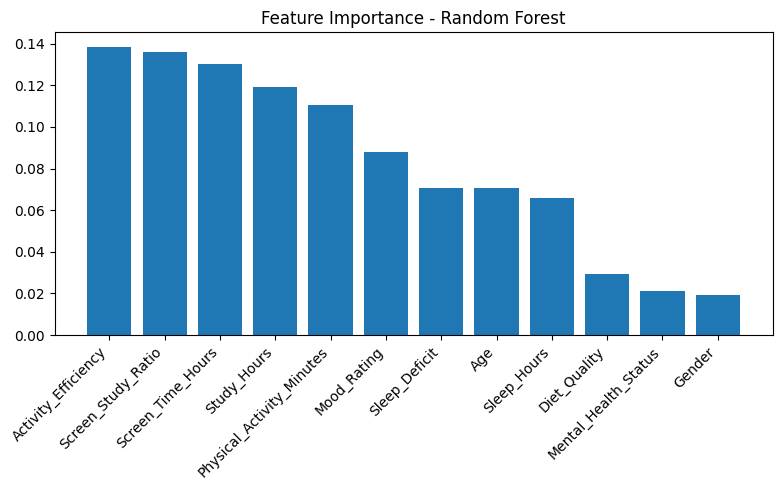

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Ambil nama fitur
feature_names = X_fe.columns
importances = rf_fe.feature_importances_

# Urutkan berdasarkan pentingnya
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
plt.title("Feature Importance - Random Forest")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [12]:
from sklearn.model_selection import cross_val_score

# Cross-validation pada data dengan fitur engineering
cv_scores = cross_val_score(rf_fe, X_fe, y_fe, cv=5, scoring='r2')
print("R² Score tiap fold:", cv_scores)
print("Rata-rata R² Score CV:", np.mean(cv_scores))


R² Score tiap fold: [-0.09881615 -0.09162216 -0.08381324 -0.13539488 -0.00138658]
Rata-rata R² Score CV: -0.08220659971010691
